## 4-9. 프로젝트: Vocabulary Size를 변경해서 시도해보기
지금까지는 모델을 변경하고, 모델을 조합해서 성능을 올리는 일에 힘썼습니다. 그런데 어쩌면 성능을 높이는 방법은 단순히 모델을 조정하는 일에 한정되지 않을 수 있습니다. 데이터의 전처리는 모델의 성능에 영향을 직접적으로 줍니다. 특히나 Bag of Words를 기반으로 하는 DTM이나 TF-IDF의 경우, 사용하는 단어의 수를 어떻게 결정하느냐에 따라서 성능에 영향을 줄 수 있겠죠.

중요도가 낮은 단어들까지 포함해 너무 많은 단어를 사용하는 경우에도 성능이 저하될 수 있고, 반대로 너무 적은 단어들을 사용해도 성능이 저하될 수 있습니다. 이렇게 변화된 단어의 수는 또 어떤 모델을 사용하느냐에 따라 유리할 수도, 불리할 수도 있습니다.

단어의 수에 따라서 모델의 성능이 어떻게 변하는지 테스트해 봅시다.

```
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)
```

앞서 num_words로 사용할 단어의 수를 조정할 수 있다는 것을 배웠습니다. 빈도수가 많은 순서대로 나열했을 때, num_words의 인자로 준 정숫값만큼의 단어를 사용하고 나머지 단어는 전부 <unk>로 처리하는 원리였었죠.

아래의 두 가지 경우에 대해서 지금까지 사용했던 모델들의 정확도를 직접 확인해 보세요.

#### 라이브러리 버전을 확인해 봅니다    
사용할 라이브러리 버전을 둘러봅시다.

In [1]:
import tensorflow
import matplotlib
import seaborn 
import numpy 
import pandas
import sklearn
from tensorflow.keras.datasets import reuters

import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

print(tensorflow.__version__)
print(matplotlib.__version__)
print(seaborn.__version__)


2.6.0
3.4.3
0.11.2


In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


In [3]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score #정확도 계산
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from tensorflow.keras.utils import to_categorical
from keras.utils.np_utils import to_categorical

#### 1. 모든 단어 사용: 시간소요 많은 관계로 아래 3번의 20000개로 대체
```
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)
```

#### 2. 빈도수 상위 5,000개의 단어만 사용: 실행소요시간 감안하여,비교편의상 아래 3번에서 5,000개 실행으로 대체
```
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2)
```

# 3. 직접 단어 개수를 설정해서 사용

위 단계에서 5000으로 제시된 num_words를 다양하게 바꾸어 가며 성능을 확인해보세요. 변화된 단어 수에 따른 모델의 성능을 연구해 보세요. 최소 3가지 경우 이상을 실험해 보기를 권합니다.
>
> 사용할 모델
>
> 나이브 베이즈 분류기, CNB, 로지스틱 회귀, 서포트 벡터 머신, 결정 트리, 랜덤 포레스트, 그래디언트 부스팅 트리, 보팅
>

## (1) num_word 개수: 20,000 개

In [4]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words= 20000, test_split=0.2)

2121728/2110848 [==============================] - 0s 0us/step


#### 1-1) 데이터 벡터화의 전과정

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246
(8982,)
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 18292, 159, 9, 1084, 363, 13, 19231, 71, 9, 16273, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 16273, 7, 748, 48, 9, 19231, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324

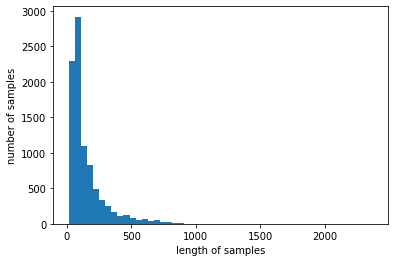

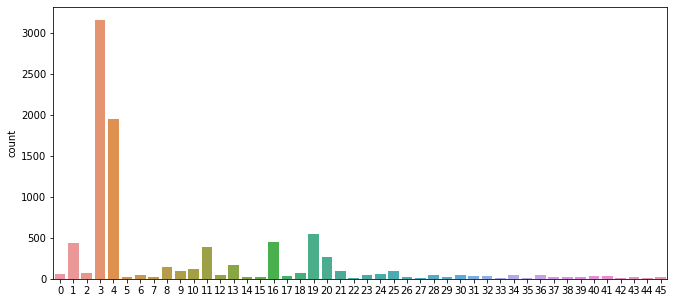

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]
565248/550378 [==============================] - 0s 0us/step
=3
30979
=3
30979
=3
=3
<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
<sos> <unk> <unk> said 

In [5]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))
print(x_train.shape)
#print(dir(reuters))
#print(len(reuters.get_word_index()))

print(x_train[0])
print(x_test[0])

num_classes = max(y_train) + 1
print('클래스의 수 : {}'.format(num_classes))

print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train)
plt.show()

unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

word_index = reuters.get_word_index(path="reuters_word_index.json")
print('=3')
print(len(word_index))

word_index = reuters.get_word_index(path="reuters_word_index.json")
print('=3')
print(len(word_index))

index_to_word = { index+3 : word for word, index in word_index.items() }
print('=3')

# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token
print('=3')

print(' '.join([index_to_word[index] for index in x_train[0]]))

print(' '.join([index_to_word[index] for index in x_train[0]]))

## 전체 훈련용 뉴스 데이터와 전체 테스트용 뉴스 데이터를 텍스트 데이터로 변환
# train data
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))
# test data
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

# 변환여부 확인
x_train[:5]
x_test[:5]

## DTM을 생성하고, DTM의 크기를 확인
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

## TF-IDF Matrix 생성하고,크기를 확인
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

#### 1-2) 모델별 학습및 성능테스트

In [8]:
import os, time, copy

## 혼동 행렬(confusion matrix) 시각화함수 생성
def graph_confusion_matrix(model, x_test, y_test):#, classes_name):
  df_cm = pd.DataFrame(confusion_matrix(y_test, model.predict(x_test)))#, index=classes_name, columns=classes_name)
  fig = plt.figure(figsize=(12,12))
  heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
  plt.ylabel('label')
  plt.xlabel('predicted value')

start = time.time()

## 3-1) 나이브 베이즈 분류기(Multinomial Naive Bayes Classifier)
# 학습
model = MultinomialNB()
model.fit(tfidfv, y_train)
# 테스트
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환
predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측
MultinomialNB_accuracy = accuracy_score(y_test, predicted) #예측값과 실제값 비교
print("MultinomialNB 정확도:", MultinomialNB_accuracy)
MultinomialNB_report = classification_report(y_test, predicted, zero_division=0)
MultinomialNB_report_summary = MultinomialNB_report[:50] + MultinomialNB_report[-163:]
print("MultinomialNB_report_summary",MultinomialNB_report_summary)
# 혼돈행렬시각화
#graph_confusion_matrix(model, tfidfv_test, y_test)

end = time.time()
need_time1 = (end - start) /60
print("소요시간1:", int(need_time1),"분")

## 3-2) Complement Naive Bayes Classifier(CNB)
# 학습
cb = ComplementNB()
cb.fit(tfidfv, y_train)
# 테스트
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
ComplementNB_accuracy = accuracy_score(y_test, predicted) #예측값과 실제값 비교
print("ComplementNB 정확도:", ComplementNB_accuracy)
ComplementNB_report = classification_report(y_test, predicted, zero_division=0)
ComplementNB_report_summary = ComplementNB_report[:50] + ComplementNB_report[-163:]  
print("ComplementNB_report_summary",ComplementNB_report_summary)
# 혼돈행렬시각화
#graph_confusion_matrix(model, tfidfv_test, y_test)

end = time.time()
need_time2 = (end - start) /60
print("소요시간2:", int(need_time2),"분")

## 3-3) 로지스틱 회귀(Logistic Regression)
# 학습: 10분 정도 소요됩니다.
lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
lr.fit(tfidfv, y_train)
# 테스트
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
LogisticRegression_accuracy = accuracy_score(y_test, predicted) #예측값과 실제값 비교
print("LogisticRegression 정확도:", LogisticRegression_accuracy)
LogisticRegression_report = classification_report(y_test, predicted, zero_division=0)
LogisticRegression_report_summary = LogisticRegression_report[:50] + LogisticRegression_report[-163:]  
print("LogisticRegression_report_summary",LogisticRegression_report_summary)
# 혼돈행렬시각화
#graph_confusion_matrix(model, tfidfv_test, y_test)

end = time.time()
need_time3 = (end - start) /60
print("소요시간3:", int(need_time3),"분")

## 3-4) 선형 서포트 벡터 머신(Linear Support Vector Machine)
# 학습: 
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
lsvc.fit(tfidfv, y_train)
# 테스트
predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
LinearSVC_accuracy = accuracy_score(y_test, predicted) #예측값과 실제값 비교
print("Linear Support Vector Machine 정확도:", LinearSVC_accuracy)
LinearSVC_report = classification_report(y_test, predicted, zero_division=0)
LinearSVC_report_summary = LinearSVC_report[:50] + LinearSVC_report[-163:]
print("LinearSVC_report_summary",LinearSVC_report_summary)
# 혼돈행렬시각화
#graph_confusion_matrix(model, tfidfv_test, y_test)

end = time.time()
need_time4 = (end - start) /60
print("소요시간4:", int(need_time4),"분")

## 3-5) 결정 트리(Decision Tree)
# 학습: 
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)
# 테스트
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
DecisionTreeClassifier_accuracy = accuracy_score(y_test, predicted) #예측값과 실제값 비교
print("Decision Tree 정확도:", DecisionTreeClassifier_accuracy)
DecisionTree_report = classification_report(y_test, predicted, zero_division=0)
DecisionTree_report_summary = DecisionTree_report[:50] + DecisionTree_report[-163:]  
print("DecisionTree_report_summary",DecisionTree_report_summary)
# 혼돈행렬시각화
#graph_confusion_matrix(model, tfidfv_test, y_test)

end = time.time()
need_time5 = (end - start) /60
print("소요시간5:", int(need_time5),"분")

## 3-6) 랜덤 포레스트(Random Forest)
# 학습: 
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)
# 테스트
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
RandomForestClassifier_accuracy = accuracy_score(y_test, predicted) #예측값과 실제값 비교
print("Random Forest 정확도:", RandomForestClassifier_accuracy)
RandomForest_report = classification_report(y_test, predicted, zero_division=0)
RandomForest_report_summary = RandomForest_report[:50] + RandomForest_report[-163:]  
print("RandomForest_report_summary",RandomForest_report_summary)
# 혼돈행렬시각화
#graph_confusion_matrix(model, tfidfv_test, y_test)

end = time.time()
need_time6 = (end - start) /60
print("소요시간6:", int(need_time6),"분")

## 3-7) 그래디언트 부스팅 트리(GradientBoostingClassifier)
# 학습: 15분 정도 소요
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)
# 테스트
predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
GradientBoostingClassifier_accuracy = accuracy_score(y_test, predicted) #예측값과 실제값 비교
print("GradientBoostingClassifier 정확도:", GradientBoostingClassifier_accuracy)
GradientBoosting_report = classification_report(y_test, predicted, zero_division=0)
GradientBoosting_report_summary = GradientBoosting_report[:50] + GradientBoosting_report[-163:]  
print("GradientBoosting_summary",GradientBoosting_report_summary)
# 혼돈행렬시각화
#graph_confusion_matrix(model, tfidfv_test, y_test)

end = time.time()
need_time7 = (end - start) /60
print("소요시간7:", int(need_time7),"분")

## 3-8) 보팅(Voting)
# 학습:  20분 이상 소요
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, max_iter=3000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft')
voting_classifier.fit(tfidfv, y_train)
# 테스트
predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
VotingClassifier_accuracy = accuracy_score(y_test, predicted) #예측값과 실제값 비교
print("Voting 정확도:", VotingClassifier_accuracy)
Voting_report = classification_report(y_test, predicted, zero_division=0)
Voting_report_summary = Voting_report[:50] + Voting_report[-163:]  
print("Voting_report_summary",Voting_report_summary)
# 혼돈행렬시각화
#graph_confusion_matrix(model, tfidfv_test, y_test)

# 소요시간
end = time.time()
need_time8 = (end - start) /60
print("소요시간8:", int(need_time8),"분")


MultinomialNB 정확도: 0.6193232413178985
MultinomialNB_report_summary               precision    recall  f1-score   supp
    accuracy                           0.62      2246
   macro avg       0.11      0.08      0.08      2246
weighted avg       0.52      0.62      0.53      2246

소요시간1: 0 분
ComplementNB 정확도: 0.7671415850400712
ComplementNB_report_summary               precision    recall  f1-score   supp
    accuracy                           0.62      2246
   macro avg       0.11      0.08      0.08      2246
weighted avg       0.52      0.62      0.53      2246

소요시간2: 0 분
LogisticRegression 정확도: 0.8156723063223509
LogisticRegression_report_summary               precision    recall  f1-score   supp
    accuracy                           0.82      2246
   macro avg       0.79      0.63      0.67      2246
weighted avg       0.82      0.82      0.81      2246

소요시간3: 14 분


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Linear Support Vector Machine 정확도: 0.7876224398931434
LinearSVC_report_summary               precision    recall  f1-score   supp
    accuracy                           0.79      2246
   macro avg       0.68      0.61      0.62      2246
weighted avg       0.79      0.79      0.78      2246

소요시간4: 15 분
Decision Tree 정확도: 0.6211041852181657
DecisionTree_report_summary               precision    recall  f1-score   supp
    accuracy                           0.62      2246
   macro avg       0.23      0.15      0.16      2246
weighted avg       0.62      0.62      0.58      2246

소요시간5: 15 분
Random Forest 정확도: 0.6714158504007124
RandomForest_report_summary               precision    recall  f1-score   supp
    accuracy                           0.67      2246
   macro avg       0.44      0.26      0.29      2246
weighted avg       0.65      0.67      0.64      2246

소요시간6: 15 분
GradientBoostingClassifier 정확도: 0.7702582368655387
GradientBoosting_summary               precision    recall  

In [12]:
## [정정 ] classification 오류있는 모델1개 만 다시 실행
## 3-2) Complement Naive Bayes Classifier(CNB)
# 학습
cb = ComplementNB()
cb.fit(tfidfv, y_train)
# 테스트
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
ComplementNB_accuracy = accuracy_score(y_test, predicted) #예측값과 실제값 비교
print("ComplementNB 정확도:", ComplementNB_accuracy)
ComplementNB_report = classification_report(y_test, predicted, zero_division=0)
ComplementNB_report_summary = ComplementNB_report[:50] + ComplementNB_report[-163:]  
print("ComplementNB_report_summary_수정분",ComplementNB_report_summary)

ComplementNB 정확도: 0.7671415850400712
ComplementNB_report_summary_수정분               precision    recall  f1-score   supp
    accuracy                           0.77      2246
   macro avg       0.61      0.42      0.46      2246
weighted avg       0.75      0.77      0.74      2246



#### 1-3) 성능 평가

**성능 평가**   
* 정확도 및 weight avg fi score 70%이상 모델 5개   
ComplementNB 정확도: 0.7671415850400712/weighted avg f1 0.74/   
LogisticRegression 정확도: 0.8156723063223509/ 0.81/   
Linear Support Vector Machine 정확도: 0.7876224398931434/0.78/   
GradientBoostingClassifier 정확도: 0.7702582368655387/0.76/       
Voting 정확도: 0.8192341941228851/0.82/   
>
>
* **Accuracy 및 weight avg fi score 80% 이상 모델 2개**   
> **LogisticRegression** 정확도: 0.8156723063223509// weighted avg f1 0.81              
> **Voting** 정확도: 0.8192341941228851// weighted avg f1  0.82   

## (2) num_word 개수: 5,000 개

In [13]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words= 5000, test_split=0.2)

#### 2-1) 데이터 벡터화의 전과정

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246
(8982,)
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 1

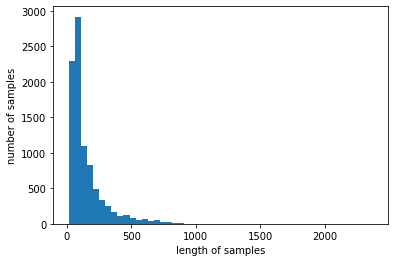

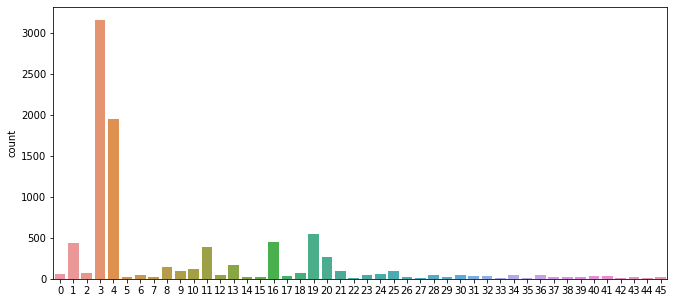

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]
=3
30979
=3
30979
=3
=3
<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
<sos> <unk> <unk> said as a result of its december acquisition of space co it expect

In [14]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))
print(x_train.shape)
#print(dir(reuters))
#print(len(reuters.get_word_index()))

print(x_train[0])
print(x_test[0])

num_classes = max(y_train) + 1
print('클래스의 수 : {}'.format(num_classes))

print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train)
plt.show()

unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

word_index = reuters.get_word_index(path="reuters_word_index.json")
print('=3')
print(len(word_index))

word_index = reuters.get_word_index(path="reuters_word_index.json")
print('=3')
print(len(word_index))

index_to_word = { index+3 : word for word, index in word_index.items() }
print('=3')

# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token
print('=3')

print(' '.join([index_to_word[index] for index in x_train[0]]))

print(' '.join([index_to_word[index] for index in x_train[0]]))

## 전체 훈련용 뉴스 데이터와 전체 테스트용 뉴스 데이터를 텍스트 데이터로 변환
# train data
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))
# test data
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

# 변환여부 확인
x_train[:5]
x_test[:5]

## DTM을 생성하고, DTM의 크기를 확인
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

## TF-IDF Matrix 생성하고,크기를 확인
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

#### 2-2) 모델별 학습및 성능테스트

In [17]:
import os, time, copy

## 혼동 행렬(confusion matrix) 시각화함수 생성
def graph_confusion_matrix(model, x_test, y_test):#, classes_name):
  df_cm = pd.DataFrame(confusion_matrix(y_test, model.predict(x_test)))#, index=classes_name, columns=classes_name)
  fig = plt.figure(figsize=(12,12))
  heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
  plt.ylabel('label')
  plt.xlabel('predicted value')

start = time.time()

## 3-1) 나이브 베이즈 분류기(Multinomial Naive Bayes Classifier)
# 학습
model = MultinomialNB()
model.fit(tfidfv, y_train)
# 테스트
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환
predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측
MultinomialNB_accuracy = accuracy_score(y_test, predicted) #예측값과 실제값 비교
print("MultinomialNB 정확도:", MultinomialNB_accuracy)
MultinomialNB_report = classification_report(y_test, predicted, zero_division=0)
MultinomialNB_report_summary = MultinomialNB_report[:50] + MultinomialNB_report[-163:]
print("MultinomialNB_report_summary",MultinomialNB_report_summary)
# 혼돈행렬시각화
#graph_confusion_matrix(model, tfidfv_test, y_test)

end = time.time()
need_time1 = (end - start) /60
print("소요시간1:", int(need_time1),"분")

## 3-2) Complement Naive Bayes Classifier(CNB)
# 학습
cb = ComplementNB()
cb.fit(tfidfv, y_train)
# 테스트
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
ComplementNB_accuracy = accuracy_score(y_test, predicted) #예측값과 실제값 비교
print("ComplementNB 정확도:", ComplementNB_accuracy)
ComplementNB_report = classification_report(y_test, predicted, zero_division=0)
ComplementNB_report_summary = ComplementNB_report[:50] + ComplementNB_report[-163:]  
print("ComplementNB_report_summary",ComplementNB_report_summary)
# 혼돈행렬시각화
#graph_confusion_matrix(model, tfidfv_test, y_test)

end = time.time()
need_time2 = (end - start) /60
print("소요시간2:", int(need_time2),"분")

## 3-3) 로지스틱 회귀(Logistic Regression)
# 학습: 10분 정도 소요됩니다.
lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
lr.fit(tfidfv, y_train)
# 테스트
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
LogisticRegression_accuracy = accuracy_score(y_test, predicted) #예측값과 실제값 비교
print("LogisticRegression 정확도:", LogisticRegression_accuracy)
LogisticRegression_report = classification_report(y_test, predicted, zero_division=0)
LogisticRegression_report_summary = LogisticRegression_report[:50] + LogisticRegression_report[-163:]  
print("LogisticRegression_report_summary",LogisticRegression_report_summary)
# 혼돈행렬시각화
#graph_confusion_matrix(model, tfidfv_test, y_test)

end = time.time()
need_time3 = (end - start) /60
print("소요시간3:", int(need_time3),"분")

## 3-4) 선형 서포트 벡터 머신(Linear Support Vector Machine)
# 학습: 
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
lsvc.fit(tfidfv, y_train)
# 테스트
predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
LinearSVC_accuracy = accuracy_score(y_test, predicted) #예측값과 실제값 비교
print("Linear Support Vector Machine 정확도:", LinearSVC_accuracy)
LinearSVC_report = classification_report(y_test, predicted, zero_division=0)
LinearSVC_report_summary = LinearSVC_report[:50] + LinearSVC_report[-163:]
print("LinearSVC_report_summary",LinearSVC_report_summary)
# 혼돈행렬시각화
#graph_confusion_matrix(model, tfidfv_test, y_test)

end = time.time()
need_time4 = (end - start) /60
print("소요시간4:", int(need_time4),"분")

## 3-5) 결정 트리(Decision Tree)
# 학습: 
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)
# 테스트
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
DecisionTreeClassifier_accuracy = accuracy_score(y_test, predicted) #예측값과 실제값 비교
print("Decision Tree 정확도:", DecisionTreeClassifier_accuracy)
DecisionTree_report = classification_report(y_test, predicted, zero_division=0)
DecisionTree_report_summary = DecisionTree_report[:50] + DecisionTree_report[-163:]  
print("DecisionTree_report_summary",DecisionTree_report_summary)
# 혼돈행렬시각화
#graph_confusion_matrix(model, tfidfv_test, y_test)

end = time.time()
need_time5 = (end - start) /60
print("소요시간5:", int(need_time5),"분")

## 3-6) 랜덤 포레스트(Random Forest)
# 학습: 
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)
# 테스트
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
RandomForestClassifier_accuracy = accuracy_score(y_test, predicted) #예측값과 실제값 비교
print("Random Forest 정확도:", RandomForestClassifier_accuracy)
RandomForest_report = classification_report(y_test, predicted, zero_division=0)
RandomForest_report_summary = RandomForest_report[:50] + RandomForest_report[-163:]  
print("RandomForest_report_summary",RandomForest_report_summary)
# 혼돈행렬시각화
#graph_confusion_matrix(model, tfidfv_test, y_test)

end = time.time()
need_time6 = (end - start) /60
print("소요시간6:", int(need_time6),"분")

## 3-7) 그래디언트 부스팅 트리(GradientBoostingClassifier)
# 학습: 15분 정도 소요
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)
# 테스트
predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
GradientBoostingClassifier_accuracy = accuracy_score(y_test, predicted) #예측값과 실제값 비교
print("GradientBoostingClassifier 정확도:", GradientBoostingClassifier_accuracy)
GradientBoosting_report = classification_report(y_test, predicted, zero_division=0)
GradientBoosting_report_summary = GradientBoosting_report[:50] + GradientBoosting_report[-163:]  
print("GradientBoosting_summary",GradientBoosting_report_summary)
# 혼돈행렬시각화
#graph_confusion_matrix(model, tfidfv_test, y_test)

end = time.time()
need_time7 = (end - start) /60
print("소요시간7:", int(need_time7),"분")

## 3-8) 보팅(Voting)
# 학습:  20분 이상 소요
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, max_iter=3000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft')
voting_classifier.fit(tfidfv, y_train)
# 테스트
predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
VotingClassifier_accuracy = accuracy_score(y_test, predicted) #예측값과 실제값 비교
print("Voting 정확도:", VotingClassifier_accuracy)
Voting_report = classification_report(y_test, predicted, zero_division=0)
Voting_report_summary = Voting_report[:50] + Voting_report[-163:]  
print("Voting_report_summary",Voting_report_summary)
# 혼돈행렬시각화
#graph_confusion_matrix(model, tfidfv_test, y_test)

# 소요시간
end = time.time()
need_time8 = (end - start) /60
print("소요시간8:", int(need_time8),"분")


MultinomialNB 정확도: 0.6731967943009796
MultinomialNB_report_summary               precision    recall  f1-score   supp
    accuracy                           0.67      2246
   macro avg       0.16      0.12      0.11      2246
weighted avg       0.60      0.67      0.60      2246

소요시간1: 0 분
ComplementNB 정확도: 0.7707034728406055
ComplementNB_report_summary               precision    recall  f1-score   supp
    accuracy                           0.77      2246
   macro avg       0.63      0.44      0.48      2246
weighted avg       0.76      0.77      0.75      2246

소요시간2: 0 분
LogisticRegression 정확도: 0.8036509349955476
LogisticRegression_report_summary               precision    recall  f1-score   supp
    accuracy                           0.80      2246
   macro avg       0.76      0.61      0.65      2246
weighted avg       0.80      0.80      0.80      2246

소요시간3: 7 분


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Linear Support Vector Machine 정확도: 0.7733748886910062
LinearSVC_report_summary               precision    recall  f1-score   supp
    accuracy                           0.77      2246
   macro avg       0.70      0.60      0.62      2246
weighted avg       0.77      0.77      0.77      2246

소요시간4: 9 분
Decision Tree 정확도: 0.6179875333926982
DecisionTree_report_summary               precision    recall  f1-score   supp
    accuracy                           0.62      2246
   macro avg       0.24      0.17      0.18      2246
weighted avg       0.61      0.62      0.57      2246

소요시간5: 9 분
Random Forest 정확도: 0.701246660730187
RandomForest_report_summary               precision    recall  f1-score   supp
    accuracy                           0.70      2246
   macro avg       0.54      0.31      0.36      2246
weighted avg       0.69      0.70      0.68      2246

소요시간6: 9 분
GradientBoostingClassifier 정확도: 0.767586821015138
GradientBoosting_summary               precision    recall  f1-sc

#### 2-3) 성능 평가

**성능 평가**   
* 정확도 및 weight avg fi score 70%이상 모델 5개   
ComplementNB 정확도: 0.77 /weighted avg f1 0.75/   
LogisticRegression 정확도: 0.80/ 0.80/   
Linear Support Vector Machine 정확도: 0.77/0.77/   
GradientBoostingClassifier 정확도: 0.77/0.77/       
Voting 정확도: 0.81/0.81/   
>
>
* **Accuracy 및 weight avg fi score 80% 이상 모델 2개**   
> **LogisticRegression** 정확도: 0.80// weighted avg f1 0.80             
> **Voting** 정확도: 0.81// weighted avg f1  0.81   

## (3) num_word 개수: 10000 개

In [19]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words= 10000, test_split=0.2)

#### 3-1) 데이터 벡터화의 전과정

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246
(8982,)
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 1

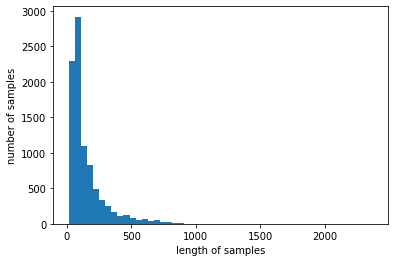

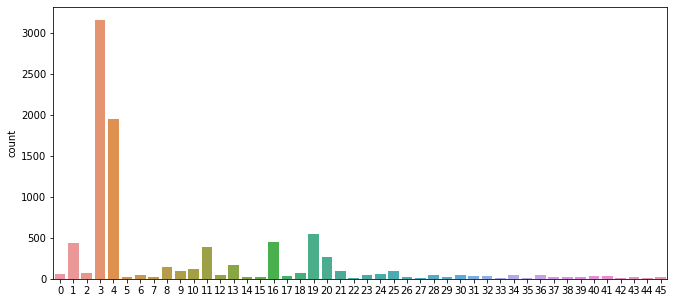

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]
=3
30979
=3
30979
=3
=3
<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
<sos> <unk> <unk> said as a result of its december acquisition of space co it expect

In [20]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))
print(x_train.shape)
#print(dir(reuters))
#print(len(reuters.get_word_index()))

print(x_train[0])
print(x_test[0])

num_classes = max(y_train) + 1
print('클래스의 수 : {}'.format(num_classes))

print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train)
plt.show()

unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

word_index = reuters.get_word_index(path="reuters_word_index.json")
print('=3')
print(len(word_index))

word_index = reuters.get_word_index(path="reuters_word_index.json")
print('=3')
print(len(word_index))

index_to_word = { index+3 : word for word, index in word_index.items() }
print('=3')

# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token
print('=3')

print(' '.join([index_to_word[index] for index in x_train[0]]))

print(' '.join([index_to_word[index] for index in x_train[0]]))

## 전체 훈련용 뉴스 데이터와 전체 테스트용 뉴스 데이터를 텍스트 데이터로 변환
# train data
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))
# test data
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

# 변환여부 확인
x_train[:5]
x_test[:5]

## DTM을 생성하고, DTM의 크기를 확인
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

## TF-IDF Matrix 생성하고,크기를 확인
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

#### 3-2) 모델별 학습및 성능테스트

In [21]:
import os, time, copy

## 혼동 행렬(confusion matrix) 시각화함수 생성
def graph_confusion_matrix(model, x_test, y_test):#, classes_name):
  df_cm = pd.DataFrame(confusion_matrix(y_test, model.predict(x_test)))#, index=classes_name, columns=classes_name)
  fig = plt.figure(figsize=(12,12))
  heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
  plt.ylabel('label')
  plt.xlabel('predicted value')

start = time.time()

## 3-1) 나이브 베이즈 분류기(Multinomial Naive Bayes Classifier)
# 학습
model = MultinomialNB()
model.fit(tfidfv, y_train)
# 테스트
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환
predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측
MultinomialNB_accuracy = accuracy_score(y_test, predicted) #예측값과 실제값 비교
print("MultinomialNB 정확도:", MultinomialNB_accuracy)
MultinomialNB_report = classification_report(y_test, predicted, zero_division=0)
MultinomialNB_report_summary = MultinomialNB_report[:50] + MultinomialNB_report[-163:]
print("MultinomialNB_report_summary",MultinomialNB_report_summary)
# 혼돈행렬시각화
#graph_confusion_matrix(model, tfidfv_test, y_test)

end = time.time()
need_time1 = (end - start) /60
print("소요시간1:", int(need_time1),"분")

## 3-2) Complement Naive Bayes Classifier(CNB)
# 학습
cb = ComplementNB()
cb.fit(tfidfv, y_train)
# 테스트
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
ComplementNB_accuracy = accuracy_score(y_test, predicted) #예측값과 실제값 비교
print("ComplementNB 정확도:", ComplementNB_accuracy)
ComplementNB_report = classification_report(y_test, predicted, zero_division=0)
ComplementNB_report_summary = ComplementNB_report[:50] + ComplementNB_report[-163:]  
print("ComplementNB_report_summary",ComplementNB_report_summary)
# 혼돈행렬시각화
#graph_confusion_matrix(model, tfidfv_test, y_test)

end = time.time()
need_time2 = (end - start) /60
print("소요시간2:", int(need_time2),"분")

## 3-3) 로지스틱 회귀(Logistic Regression)
# 학습: 10분 정도 소요됩니다.
lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
lr.fit(tfidfv, y_train)
# 테스트
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
LogisticRegression_accuracy = accuracy_score(y_test, predicted) #예측값과 실제값 비교
print("LogisticRegression 정확도:", LogisticRegression_accuracy)
LogisticRegression_report = classification_report(y_test, predicted, zero_division=0)
LogisticRegression_report_summary = LogisticRegression_report[:50] + LogisticRegression_report[-163:]  
print("LogisticRegression_report_summary",LogisticRegression_report_summary)
# 혼돈행렬시각화
#graph_confusion_matrix(model, tfidfv_test, y_test)

end = time.time()
need_time3 = (end - start) /60
print("소요시간3:", int(need_time3),"분")

## 3-4) 선형 서포트 벡터 머신(Linear Support Vector Machine)
# 학습: 
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
lsvc.fit(tfidfv, y_train)
# 테스트
predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
LinearSVC_accuracy = accuracy_score(y_test, predicted) #예측값과 실제값 비교
print("Linear Support Vector Machine 정확도:", LinearSVC_accuracy)
LinearSVC_report = classification_report(y_test, predicted, zero_division=0)
LinearSVC_report_summary = LinearSVC_report[:50] + LinearSVC_report[-163:]
print("LinearSVC_report_summary",LinearSVC_report_summary)
# 혼돈행렬시각화
#graph_confusion_matrix(model, tfidfv_test, y_test)

end = time.time()
need_time4 = (end - start) /60
print("소요시간4:", int(need_time4),"분")

## 3-5) 결정 트리(Decision Tree)
# 학습: 
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)
# 테스트
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
DecisionTreeClassifier_accuracy = accuracy_score(y_test, predicted) #예측값과 실제값 비교
print("Decision Tree 정확도:", DecisionTreeClassifier_accuracy)
DecisionTree_report = classification_report(y_test, predicted, zero_division=0)
DecisionTree_report_summary = DecisionTree_report[:50] + DecisionTree_report[-163:]  
print("DecisionTree_report_summary",DecisionTree_report_summary)
# 혼돈행렬시각화
#graph_confusion_matrix(model, tfidfv_test, y_test)

end = time.time()
need_time5 = (end - start) /60
print("소요시간5:", int(need_time5),"분")

## 3-6) 랜덤 포레스트(Random Forest)
# 학습: 
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)
# 테스트
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
RandomForestClassifier_accuracy = accuracy_score(y_test, predicted) #예측값과 실제값 비교
print("Random Forest 정확도:", RandomForestClassifier_accuracy)
RandomForest_report = classification_report(y_test, predicted, zero_division=0)
RandomForest_report_summary = RandomForest_report[:50] + RandomForest_report[-163:]  
print("RandomForest_report_summary",RandomForest_report_summary)
# 혼돈행렬시각화
#graph_confusion_matrix(model, tfidfv_test, y_test)

end = time.time()
need_time6 = (end - start) /60
print("소요시간6:", int(need_time6),"분")

## 3-7) 그래디언트 부스팅 트리(GradientBoostingClassifier)
# 학습: 15분 정도 소요
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)
# 테스트
predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
GradientBoostingClassifier_accuracy = accuracy_score(y_test, predicted) #예측값과 실제값 비교
print("GradientBoostingClassifier 정확도:", GradientBoostingClassifier_accuracy)
GradientBoosting_report = classification_report(y_test, predicted, zero_division=0)
GradientBoosting_report_summary = GradientBoosting_report[:50] + GradientBoosting_report[-163:]  
print("GradientBoosting_summary",GradientBoosting_report_summary)
# 혼돈행렬시각화
#graph_confusion_matrix(model, tfidfv_test, y_test)

end = time.time()
need_time7 = (end - start) /60
print("소요시간7:", int(need_time7),"분")

## 3-8) 보팅(Voting)
# 학습:  20분 이상 소요
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, max_iter=3000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft')
voting_classifier.fit(tfidfv, y_train)
# 테스트
predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
VotingClassifier_accuracy = accuracy_score(y_test, predicted) #예측값과 실제값 비교
print("Voting 정확도:", VotingClassifier_accuracy)
Voting_report = classification_report(y_test, predicted, zero_division=0)
Voting_report_summary = Voting_report[:50] + Voting_report[-163:]  
print("Voting_report_summary",Voting_report_summary)
# 혼돈행렬시각화
#graph_confusion_matrix(model, tfidfv_test, y_test)

# 소요시간
end = time.time()
need_time8 = (end - start) /60
print("소요시간8:", int(need_time8),"분")


MultinomialNB 정확도: 0.6567230632235085
MultinomialNB_report_summary               precision    recall  f1-score   supp
    accuracy                           0.66      2246
   macro avg       0.17      0.10      0.10      2246
weighted avg       0.59      0.66      0.58      2246

소요시간1: 0 분
ComplementNB 정확도: 0.7707034728406055
ComplementNB_report_summary               precision    recall  f1-score   supp
    accuracy                           0.77      2246
   macro avg       0.63      0.44      0.48      2246
weighted avg       0.75      0.77      0.75      2246

소요시간2: 0 분
LogisticRegression 정확도: 0.8107747105966162
LogisticRegression_report_summary               precision    recall  f1-score   supp
    accuracy                           0.81      2246
   macro avg       0.78      0.63      0.67      2246
weighted avg       0.81      0.81      0.81      2246

소요시간3: 10 분


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Linear Support Vector Machine 정확도: 0.7871772039180766
LinearSVC_report_summary               precision    recall  f1-score   supp
    accuracy                           0.79      2246
   macro avg       0.73      0.62      0.64      2246
weighted avg       0.79      0.79      0.78      2246

소요시간4: 11 분
Decision Tree 정확도: 0.6202137132680321
DecisionTree_report_summary               precision    recall  f1-score   supp
    accuracy                           0.62      2246
   macro avg       0.23      0.18      0.18      2246
weighted avg       0.61      0.62      0.58      2246

소요시간5: 12 분
Random Forest 정확도: 0.674087266251113
RandomForest_report_summary               precision    recall  f1-score   supp
    accuracy                           0.67      2246
   macro avg       0.46      0.27      0.31      2246
weighted avg       0.66      0.67      0.64      2246

소요시간6: 12 분
GradientBoostingClassifier 정확도: 0.7662511130899377
GradientBoosting_summary               precision    recall  f

#### 3-3) 성능 평가

**성능 평가**   
* 정확도 및 weight avg fi score 70%이상 모델 5개   
ComplementNB 정확도: 0.77 /weighted avg f1 0.75/   
LogisticRegression 정확도: 0.81 / 0.81/   
Linear Support Vector Machine 정확도: 0.79 /0.78/   
GradientBoostingClassifier 정확도: 0.77 /0.76/       
Voting 정확도: 0.82/0.81/   
>
>
* **Accuracy 및 weight avg fi score 80% 이상 모델 2개**   
> **LogisticRegression** 정확도: 0.81 // weighted avg f1 0.81              
> **Voting** 정확도: 0.82// weighted avg f1  0.81   

## (4) num_word 개수: 15,000 개

In [22]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words= 15000, test_split=0.2)

#### 4-1) 데이터 벡터화의 전과정

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246
(8982,)
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 1

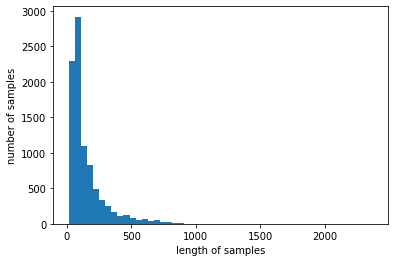

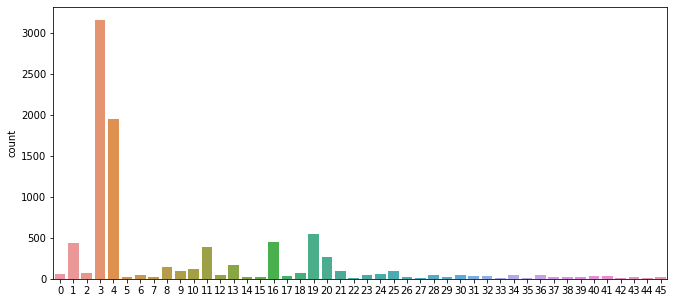

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]
=3
30979
=3
30979
=3
=3
<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
<sos> <unk> <unk> said as a result of its december acquisition of space co it expect

In [23]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))
print(x_train.shape)
#print(dir(reuters))
#print(len(reuters.get_word_index()))

print(x_train[0])
print(x_test[0])

num_classes = max(y_train) + 1
print('클래스의 수 : {}'.format(num_classes))

print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train)
plt.show()

unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

word_index = reuters.get_word_index(path="reuters_word_index.json")
print('=3')
print(len(word_index))

word_index = reuters.get_word_index(path="reuters_word_index.json")
print('=3')
print(len(word_index))

index_to_word = { index+3 : word for word, index in word_index.items() }
print('=3')

# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token
print('=3')

print(' '.join([index_to_word[index] for index in x_train[0]]))

print(' '.join([index_to_word[index] for index in x_train[0]]))

## 전체 훈련용 뉴스 데이터와 전체 테스트용 뉴스 데이터를 텍스트 데이터로 변환
# train data
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))
# test data
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

# 변환여부 확인
x_train[:5]
x_test[:5]

## DTM을 생성하고, DTM의 크기를 확인
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

## TF-IDF Matrix 생성하고,크기를 확인
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

#### 4-2) 모델별 학습및 성능테스트

In [24]:
import os, time, copy

## 혼동 행렬(confusion matrix) 시각화함수 생성
def graph_confusion_matrix(model, x_test, y_test):#, classes_name):
  df_cm = pd.DataFrame(confusion_matrix(y_test, model.predict(x_test)))#, index=classes_name, columns=classes_name)
  fig = plt.figure(figsize=(12,12))
  heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
  plt.ylabel('label')
  plt.xlabel('predicted value')

start = time.time()

## 3-1) 나이브 베이즈 분류기(Multinomial Naive Bayes Classifier)
# 학습
model = MultinomialNB()
model.fit(tfidfv, y_train)
# 테스트
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환
predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측
MultinomialNB_accuracy = accuracy_score(y_test, predicted) #예측값과 실제값 비교
print("MultinomialNB 정확도:", MultinomialNB_accuracy)
MultinomialNB_report = classification_report(y_test, predicted, zero_division=0)
MultinomialNB_report_summary = MultinomialNB_report[:50] + MultinomialNB_report[-163:]
print("MultinomialNB_report_summary",MultinomialNB_report_summary)
# 혼돈행렬시각화
#graph_confusion_matrix(model, tfidfv_test, y_test)

end = time.time()
need_time1 = (end - start) /60
print("소요시간1:", int(need_time1),"분")

## 3-2) Complement Naive Bayes Classifier(CNB)
# 학습
cb = ComplementNB()
cb.fit(tfidfv, y_train)
# 테스트
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
ComplementNB_accuracy = accuracy_score(y_test, predicted) #예측값과 실제값 비교
print("ComplementNB 정확도:", ComplementNB_accuracy)
ComplementNB_report = classification_report(y_test, predicted, zero_division=0)
ComplementNB_report_summary = ComplementNB_report[:50] + ComplementNB_report[-163:]  
print("ComplementNB_report_summary",ComplementNB_report_summary)
# 혼돈행렬시각화
#graph_confusion_matrix(model, tfidfv_test, y_test)

end = time.time()
need_time2 = (end - start) /60
print("소요시간2:", int(need_time2),"분")

## 3-3) 로지스틱 회귀(Logistic Regression)
# 학습: 10분 정도 소요됩니다.
lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
lr.fit(tfidfv, y_train)
# 테스트
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
LogisticRegression_accuracy = accuracy_score(y_test, predicted) #예측값과 실제값 비교
print("LogisticRegression 정확도:", LogisticRegression_accuracy)
LogisticRegression_report = classification_report(y_test, predicted, zero_division=0)
LogisticRegression_report_summary = LogisticRegression_report[:50] + LogisticRegression_report[-163:]  
print("LogisticRegression_report_summary",LogisticRegression_report_summary)
# 혼돈행렬시각화
#graph_confusion_matrix(model, tfidfv_test, y_test)

end = time.time()
need_time3 = (end - start) /60
print("소요시간3:", int(need_time3),"분")

## 3-4) 선형 서포트 벡터 머신(Linear Support Vector Machine)
# 학습: 
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
lsvc.fit(tfidfv, y_train)
# 테스트
predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
LinearSVC_accuracy = accuracy_score(y_test, predicted) #예측값과 실제값 비교
print("Linear Support Vector Machine 정확도:", LinearSVC_accuracy)
LinearSVC_report = classification_report(y_test, predicted, zero_division=0)
LinearSVC_report_summary = LinearSVC_report[:50] + LinearSVC_report[-163:]
print("LinearSVC_report_summary",LinearSVC_report_summary)
# 혼돈행렬시각화
#graph_confusion_matrix(model, tfidfv_test, y_test)

end = time.time()
need_time4 = (end - start) /60
print("소요시간4:", int(need_time4),"분")

## 3-5) 결정 트리(Decision Tree)
# 학습: 
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)
# 테스트
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
DecisionTreeClassifier_accuracy = accuracy_score(y_test, predicted) #예측값과 실제값 비교
print("Decision Tree 정확도:", DecisionTreeClassifier_accuracy)
DecisionTree_report = classification_report(y_test, predicted, zero_division=0)
DecisionTree_report_summary = DecisionTree_report[:50] + DecisionTree_report[-163:]  
print("DecisionTree_report_summary",DecisionTree_report_summary)
# 혼돈행렬시각화
#graph_confusion_matrix(model, tfidfv_test, y_test)

end = time.time()
need_time5 = (end - start) /60
print("소요시간5:", int(need_time5),"분")

## 3-6) 랜덤 포레스트(Random Forest)
# 학습: 
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)
# 테스트
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
RandomForestClassifier_accuracy = accuracy_score(y_test, predicted) #예측값과 실제값 비교
print("Random Forest 정확도:", RandomForestClassifier_accuracy)
RandomForest_report = classification_report(y_test, predicted, zero_division=0)
RandomForest_report_summary = RandomForest_report[:50] + RandomForest_report[-163:]  
print("RandomForest_report_summary",RandomForest_report_summary)
# 혼돈행렬시각화
#graph_confusion_matrix(model, tfidfv_test, y_test)

end = time.time()
need_time6 = (end - start) /60
print("소요시간6:", int(need_time6),"분")

## 3-7) 그래디언트 부스팅 트리(GradientBoostingClassifier)
# 학습: 15분 정도 소요
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)
# 테스트
predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
GradientBoostingClassifier_accuracy = accuracy_score(y_test, predicted) #예측값과 실제값 비교
print("GradientBoostingClassifier 정확도:", GradientBoostingClassifier_accuracy)
GradientBoosting_report = classification_report(y_test, predicted, zero_division=0)
GradientBoosting_report_summary = GradientBoosting_report[:50] + GradientBoosting_report[-163:]  
print("GradientBoosting_summary",GradientBoosting_report_summary)
# 혼돈행렬시각화
#graph_confusion_matrix(model, tfidfv_test, y_test)

end = time.time()
need_time7 = (end - start) /60
print("소요시간7:", int(need_time7),"분")

## 3-8) 보팅(Voting)
# 학습:  20분 이상 소요
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, max_iter=3000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft')
voting_classifier.fit(tfidfv, y_train)
# 테스트
predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
VotingClassifier_accuracy = accuracy_score(y_test, predicted) #예측값과 실제값 비교
print("Voting 정확도:", VotingClassifier_accuracy)
Voting_report = classification_report(y_test, predicted, zero_division=0)
Voting_report_summary = Voting_report[:50] + Voting_report[-163:]  
print("Voting_report_summary",Voting_report_summary)
# 혼돈행렬시각화
#graph_confusion_matrix(model, tfidfv_test, y_test)

# 소요시간
end = time.time()
need_time8 = (end - start) /60
print("소요시간8:", int(need_time8),"분")


MultinomialNB 정확도: 0.6331255565449688
MultinomialNB_report_summary               precision    recall  f1-score   supp
    accuracy                           0.63      2246
   macro avg       0.13      0.09      0.09      2246
weighted avg       0.55      0.63      0.55      2246

소요시간1: 0 분
ComplementNB 정확도: 0.7720391807658059
ComplementNB_report_summary               precision    recall  f1-score   supp
    accuracy                           0.77      2246
   macro avg       0.61      0.43      0.47      2246
weighted avg       0.75      0.77      0.74      2246

소요시간2: 0 분
LogisticRegression 정확도: 0.8147818343722173
LogisticRegression_report_summary               precision    recall  f1-score   supp
    accuracy                           0.81      2246
   macro avg       0.78      0.63      0.67      2246
weighted avg       0.82      0.81      0.81      2246

소요시간3: 12 분


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Linear Support Vector Machine 정확도: 0.7889581478183437
LinearSVC_report_summary               precision    recall  f1-score   supp
    accuracy                           0.79      2246
   macro avg       0.67      0.61      0.62      2246
weighted avg       0.79      0.79      0.78      2246

소요시간4: 14 분
Decision Tree 정확도: 0.6193232413178985
DecisionTree_report_summary               precision    recall  f1-score   supp
    accuracy                           0.62      2246
   macro avg       0.23      0.17      0.18      2246
weighted avg       0.61      0.62      0.58      2246

소요시간5: 14 분
Random Forest 정확도: 0.6714158504007124
RandomForest_report_summary               precision    recall  f1-score   supp
    accuracy                           0.67      2246
   macro avg       0.43      0.26      0.30      2246
weighted avg       0.65      0.67      0.64      2246

소요시간6: 14 분
GradientBoostingClassifier 정확도: 0.7707034728406055
GradientBoosting_summary               precision    recall  

#### 4-3) 성능 평가

**성능 평가**   
* 정확도 및 weight avg fi score 70%이상 모델 5개   
ComplementNB 정확도: 0.77 /weighted avg f1 0.74/   
LogisticRegression 정확도: 0.81/ 0.81/   
Linear Support Vector Machine 정확도: 0.79 /0.78/   
GradientBoostingClassifier 정확도: 0.77 /0.77/       
Voting 정확도: 0.8192341941228851/0.82/   
>
>
* **Accuracy 및 weight avg fi score 80% 이상 모델 2개**   
> **LogisticRegression** 정확도: 0.81 // weighted avg f1 0.81              
> **Voting** 정확도: 0.81 // weighted avg f1  0.81   

## (5) num_word size별 머신러닝 8개 모델 평가

#### 5-1). num_word size 20000개 성능 평가   
* 정확도 및 weight avg fi score 70%이상 모델 5개   
ComplementNB 정확도: 0.77 /weighted avg f1 0.74/   
LogisticRegression 정확도: 0.82 / 0.81/   
Linear Support Vector Machine 정확도: 0.79 /0.78/   
GradientBoostingClassifier 정확도: 0.77 /0.76/       
Voting 정확도: 0.82 /0.82/   
>
>
* **Accuracy 및 weight avg fi score 80% 이상 모델 2개**   
> **LogisticRegression** 정확도: 0.82 // weighted avg f1 0.81              
> **Voting** 정확도: 0.82 // weighted avg f1  0.82   
    
#### 5-2). num_word size 5,000개 성능 평가   
* 정확도 및 weight avg fi score 70%이상 모델 5개   
ComplementNB 정확도: 0.77 /weighted avg f1 0.75/   
LogisticRegression 정확도: 0.80/ 0.80/   
Linear Support Vector Machine 정확도: 0.77/0.77/   
GradientBoostingClassifier 정확도: 0.77/0.77/       
Voting 정확도: 0.81/0.81/   
>
>
* **Accuracy 및 weight avg fi score 80% 이상 모델 2개**   
> **LogisticRegression** 정확도: 0.80// weighted avg f1 0.80             
> **Voting** 정확도: 0.81// weighted avg f1  0.81   
    
#### 5-3). num_word size 10,000개 성능 평가   
* 정확도 및 weight avg fi score 70%이상 모델 5개   
ComplementNB 정확도: 0.77 /weighted avg f1 0.75/   
LogisticRegression 정확도: 0.81 / 0.81/   
Linear Support Vector Machine 정확도: 0.79 /0.78/   
GradientBoostingClassifier 정확도: 0.77 /0.76/       
Voting 정확도: 0.82/0.81/   
>
>
* **Accuracy 및 weight avg fi score 80% 이상 모델 2개**   
> **LogisticRegression** 정확도: 0.81 // weighted avg f1 0.81              
> **Voting** 정확도: 0.82// weighted avg f1  0.81   


#### 5-4). num_word size 15,000개 성능 평가   
* 정확도 및 weight avg fi score 70%이상 모델 5개   
ComplementNB 정확도: 0.77 /weighted avg f1 0.74/   
LogisticRegression 정확도: 0.81/ 0.81/   
Linear Support Vector Machine 정확도: 0.79 /0.78/   
GradientBoostingClassifier 정확도: 0.77 /0.77/       
Voting 정확도: 0.8192341941228851/0.82/   
>
>
* **Accuracy 및 weight avg fi score 80% 이상 모델 2개**   
> **LogisticRegression** 정확도: 0.81 // weighted avg f1 0.81              
> **Voting** 정확도: 0.82 // weighted avg f1  0.82   

#### [1차 머신러닝 성능 종합평가]
* num_word size 5,000에서는 8개모델중 상위 5개 모델이 공통적으로 약 1% 정도씩의 성능하향이 보였으나,
10,000개이상에서는 5개 모델의  성능이 거의 같았음

* dlsms 로이터뉴스Corpus의 경우, **10,000개 수준이, 유용성있는 수준의 num_word siz인 것으로 보이고**, 그 이상의 단어들은 빈도수가 낮으며, Classify에 유의한 의미가 없는 것으로 해석해도 될 것 같음

* **어떠한 size에서건 상관없이 우수한 Accuracy와 f1 score(weighted avg f1) 성능을 보인 모델**은 **1위 Voting_Classifier 모델과 2위 LogisticRegression 모델**이었으며, Voting_Classifier 모델은 앙상블모델로서, 앙상블의 우숭성을 보였으며, 앙상블외에 개별모델로는 LogisticRegression 모델이 가장 우수하였슴

* **딥러닝모델과의 비교**는 유의미한 성능차이가 시작되는 **num_word size 10,000개의 단어를 기준**으로 성능 비교할 예정이며, 상기 **Accuracy와 f1 score(weighted avg f1) 1위인 Voting_Classifier 모델과 성능비교**를 할 예정임

# 4. 딥러닝 모델과 비교해 보기
위 과정을 통해 나온 최적의 모델과 단어 수 조건에서, 본인이 선택한 다른 모델을 적용한 결과와 비교해 봅시다. 감정 분석 등에 사용했던 RNN이나 1-D CNN 등의 딥러닝 모델 중 하나를 선택해서 오늘 사용했던 데이터셋을 학습해 보고 나오는 결과를 비교해 봅시다. 단, 공정한 비교를 위해 이때 Word2Vec 등의 pretrained model은 사용하지 않도록 합니다.

#### [주의] 로이터 뉴스의 특이점 일부 정리   
- 로이터 뉴스는 다운로드 받은 상태가 문장이 이미 벡터화되어 있으나, 데이터 전처리가 되지않은 상태로 벡터화되어있슴,         
- num_word를 10,000개로 해도, word_index 30,979개인데, 이것은 단어 및 숫자, 불용어로 분류되는 관사,접속사, 일부 특수기호등이 총 망라되어 있기 때문임,       
- 또한 index 3 이 없고, 대신 string 3 ('3') 이 각 문장의 끝에 위치해서, '< eos >'의 역할을 함(그래서,보정시에도 '< eos >'는 하지 않음)   
- '< pad >','< sos >','< unk >' 가 index_to_word 의 0,1,2 에 위치시키고, 3은 비워 놓음, 4부터 word_index의 1번이 들어가도록 되어 있슴,
  즉, word_index의 1번 index를 갖는 값은 'the'이며, 이 'the'는 index_to_word에는 index가 4로 되어 있음을 혼동하지 말아야함
- word_index에는 '< pad >','< sos >','< unk >'를 index 0,1,2 로 넣으면 않됨, 기존의 word_index들과 중복되어버림, 맨마지막 위치인 30979,30980,30981로 넣거나, 여기 프로젝트에서는 아예 무시해도됨     

In [18]:
a=10

In [19]:
a=20

#### (1) 데이터 벡터화의 전과정:

In [20]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words= 10000, test_split=0.2)

2121728/2110848 [==============================] - 0s 0us/step


In [21]:
print(type(x_train))

<class 'numpy.ndarray'>


훈련 샘플의 수: 8982
테스트 샘플의 수: 2246
(8982,)
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 1

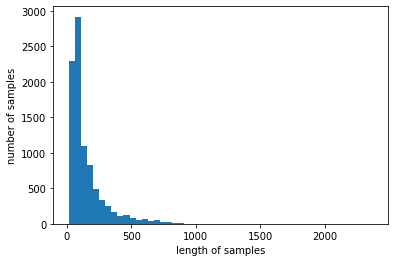

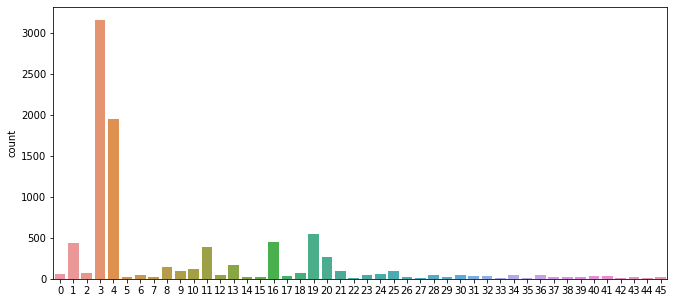

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]
565248/550378 [==============================] - 0s 0us/step
30979
보정완료여부 확인 3개:index_to_word​: word_index <pad> <sos> <unk>
보정후 x_train[0] 텍스트로 변환예시:  <sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this

In [22]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))
print(x_train.shape)
#print(dir(reuters))
#print(len(reuters.get_word_index()))

print(x_train[0])
print(x_test[0])
print(y_train[:10])
num_classes = y_train.max() + 1
print('클래스의 수 : {}'.format(num_classes))

#print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
#print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train)
plt.show()

unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

word_index = reuters.get_word_index(path="reuters_word_index.json")
print(len(word_index))

index_to_word = { index+3 : word for word, index in word_index.items() }

# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token
    #word_index[token] = index   # 이 줄은 중복인덱스가 발생하니 하지 말것 
    
print("보정완료여부 확인 3개:index_to_word​: word_index",index_to_word[0], index_to_word[1], index_to_word[2],)     
print("보정후 x_train[0] 텍스트로 변환예시: ",  ' '.join([index_to_word[index] for index in x_train[0]]))
print("보정완료 OK")

## 데이터셋 내 문장 길이 분포
total_data_text = list(x_train) + list(x_test)
total_data_text_dist = [len(x) for x in total_data_text]
#print(total_data_text_dist)

mean = round(np.mean(total_data_text_dist),2)
std = round(np.std(total_data_text_dist),2)
max = np.max(total_data_text_dist)
min = np.min(total_data_text_dist)
min_count = len([x for x in total_data_text_dist if x == 0])
print("문장길이평균:",mean)
print("문장길이표준편차:",std)
print("문장길이Max:",max)
print("문장길이Min:",min)
print("문장길이 0개수:", min_count)

maxlen = 437   # mean  int(mean + 2*std)
print("maxlen", maxlen)

## 보정 및 최대길이에 맞추어 Padding
# keras.preprocessing.sequence.pad_sequences 을 활용한 패딩 추가 및 maxlen로 일정길이 맞춤
print("len(word_index):",len(word_index))
print("x_train", x_train[:3], len(x_train), type(x_train[0][0]))

# type 확인: train 내의 word index의 type check: 모두 int 임,
floatlist = [];intlist = [];strlist = [];etclist = []
for X in x_train:
    for idx in X:
        if type(idx) == float:
            floatlist.append(idx)            
        elif type(idx) == int:
            intlist.append(idx)  
        elif type(idx) == str:
            strlist.append(idx)   
        else:
            etclist.append(idx)
print("x_train 내의 인덱스 type확인:","float",len(floatlist),"int",len(intlist),"str",len(strlist),
       "etc",len(etclist),"총개수", len(floatlist)+ len(intlist)+ len(strlist)+len(etclist)) # int만 총개수 2,176,140

# 숫자로 변환된 텍스트 데이터를 numpy array로 변경. 
x_train = np.array(x_train, dtype='object')
x_test = np.array(x_test, dtype='object')

## padding된 데이터: padding된 곳은 0 이 입력됨, train_tensor_data로 변경저장
X_train_tensor = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                       value= 0,  # <pad> index 값 : 0
                                                       padding= 'pre',           # 성능향상위해 'pre'적용 10%차이
                                                       maxlen=maxlen)       # maxlen = 437
X_test_tensor = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                       value= 0,  # <pad> index 값 : 0
                                                       padding= 'pre',           # 성능향상위해 'pre'적용 10%차이
                                                       maxlen=maxlen)       # maxlen = 437
print("padding > X_train_tensor:", X_train_tensor[:5],X_train_tensor.shape)
print("padding > X_test_tensor:", X_test_tensor[:5], X_test_tensor.shape)


## y_train, y_test 로 변경저장 및 레이블 원핫벡터로 변경저장  
y_train_tensor = to_categorical(y_train)
y_test_tensor = to_categorical(y_test)
print("y_train_tensor[:3]",y_train_tensor[:3], y_train_tensor.shape)
print("y_test_tensor[:3]",y_test_tensor[:3], y_test_tensor.shape)

## Train, valid data 분리 : 
print("X_train_tensor 총개수:", X_train_tensor.shape,X_train_tensor.shape[0])
train_len = int(X_train_tensor.shape[0]*0.8)
valid_len = X_train_tensor.shape[0] - train_len
print("train_len:", train_len, "valid_len",valid_len)

# validation set 20% 분리: 
X_val_tensor = X_train_tensor[:valid_len]   
y_val_tensor = y_train_tensor[:valid_len]

# validation set을 제외한 나머지 80%
partial_X_train = X_train_tensor[valid_len:]  
partial_y_train = y_train_tensor[valid_len:]

print("partial_X_train", partial_X_train.shape[0],"partial_y_train",len(partial_y_train))
print("X_val_tensor",X_val_tensor.shape[0], "y_val_tensor",len(y_val_tensor))



#### (2) LSTM 모델구성, 학습 및 성능테스트

In [23]:
## Hyper param 설정: Best 80.41%
vocab_size = 10000 
print("vocab_size",vocab_size)
num_classes = num_classes   #46
word_vector_dim = 200  # 워드 벡터의 차원 수
hidden_unit =  200  
drop_rate = 0.5
lr = 0.002   # origin 0.001
batch_size = 128  
epochs= 50  

# Best: maxlen 437 v 10000, wv 200, hu 200, drop 0.5, batch 128, epoch 50  rmsprop lr 0.002,Test Accu : 80.41% 

## LSTM 모델구성
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model_lstm.add(tf.keras.layers.BatchNormalization())
model_lstm.add(tf.keras.layers.Dropout(drop_rate))
model_lstm.add(tf.keras.layers.LSTM(hidden_unit))
model_lstm.add(tf.keras.layers.BatchNormalization())
model_lstm.add(tf.keras.layers.Dropout(drop_rate))
model_lstm.add(tf.keras.layers.Dense(hidden_unit, activation='relu'))
model_lstm.add(tf.keras.layers.BatchNormalization())
model_lstm.add(tf.keras.layers.Dropout(drop_rate))

model_lstm.add(tf.keras.layers.Dense(num_classes, activation='softmax'))  # 최종 출력은 46개 기사범주.
model_lstm.summary()

## LSTM 모델 학습
rmsprop = tf.keras.optimizers.RMSprop(learning_rate= lr)  
model_lstm.compile(optimizer= rmsprop, loss='categorical_crossentropy', metrics=['accuracy'])              
history_lstm = model_lstm.fit(partial_X_train, partial_y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val_tensor,
                          y_val_tensor), verbose=1)

## LSTM 모델 성능평가
print("  ")
print("LSTM 모델 성능평가")
results_lstm = model_lstm.evaluate(X_test_tensor,  y_test_tensor, verbose=2)
print("LSTM_Test_Accuracy", results_lstm)

#predicted = model_lstm.predict(X_test_tensor)
#LSTM_report = classification_report(y_test_tensor, predicted, zero_division=0)
#LSTM_report_summary = LSTM_report[:50] + LSTM_report[-163:]  
#print("LSTM_report_summary",LSTM_report_summary)
#"""


vocab_size 10000
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 200)         2000000   
_________________________________________________________________
batch_normalization_9 (Batch (None, None, 200)         800       
_________________________________________________________________
dropout_9 (Dropout)          (None, None, 200)         0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 200)               320800    
_________________________________________________________________
batch_normalization_10 (Batc (None, 200)               800       
_________________________________________________________________
dropout_10 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 2

#### (3) Conv1D model 구성 및 성능테스트

In [26]:
## CNN Hyper param 설정
vocab_size = 10000 
print("vocab_size",vocab_size)
num_classes = num_classes   #46
word_vector_dim = 200  # 워드 벡터의 차원 수
hidden_unit = 200
cnn_dense_hidden_unit = 200 
cnn_filter = 5 
cnn_maxpool = 2 
drop_rate = 0.5
lr = 0.002
batch_size = 128  
epochs= 50 


## CNN_1D 모델

model_cnn = tf.keras.Sequential()
model_cnn.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model_cnn.add(tf.keras.layers.Dropout(drop_rate))
model_cnn.add(tf.keras.layers.Conv1D(hidden_unit,cnn_filter, activation='relu'))
model_cnn.add(tf.keras.layers.MaxPooling1D(cnn_maxpool))
model_cnn.add(tf.keras.layers.Conv1D(hidden_unit,cnn_filter, activation='relu'))
model_cnn.add(tf.keras.layers.GlobalMaxPooling1D())
model_cnn.add(tf.keras.layers.Dropout(drop_rate))
model_cnn.add(tf.keras.layers.Dense(cnn_dense_hidden_unit, activation='relu'))
model_cnn.add(tf.keras.layers.Dense(num_classes, activation='softmax'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model_cnn.summary()

rmsprop = tf.keras.optimizers.RMSprop(learning_rate= lr) 
model_cnn.compile(optimizer=rmsprop, loss='categorical_crossentropy', metrics=['accuracy'])              
  
history_cnn = model_cnn.fit(partial_X_train, partial_y_train, epochs=epochs, batch_size=batch_size, 
                            validation_data=(X_val_tensor, y_val_tensor), verbose=1)

## CNN 모델 성능평가
print("  ")
print("CNN 모델 성능평가")
results_cnn = model_cnn.evaluate(X_test_tensor,  y_test_tensor, verbose=2)
print("CNN_Test_Accuracy", results_cnn)



vocab_size 10000
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 200)         2000000   
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 200)         0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 200)         200200    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, None, 200)         0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, None, 200)         200200    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 200)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 2

# 5. 종합평가

### 1. 20000개 
**성능 평가**   
* 정확도 및 weight avg fi score 70%이상 모델 5개   
ComplementNB 정확도: 0.7671415850400712/weighted avg f1 0.74/   
LogisticRegression 정확도: 0.8156723063223509/ 0.81/   
Linear Support Vector Machine 정확도: 0.7876224398931434/0.78/   
GradientBoostingClassifier 정확도: 0.7702582368655387/0.76/       
Voting 정확도: 0.8192341941228851/0.82/   
>
* **Accuracy 및 weight avg fi score 80% 이상 모델 2개**   
> **LogisticRegression** 정확도: 0.8156723063223509// weighted avg f1 0.81              
> **Voting** 정확도: 0.8192341941228851// weighted avg f1  0.82   
    
### 2. 5,000개
**성능 평가**   
* 정확도 및 weight avg fi score 70%이상 모델 5개   
ComplementNB 정확도: 0.77 /weighted avg f1 0.75/   
LogisticRegression 정확도: 0.80/ 0.80/   
Linear Support Vector Machine 정확도: 0.77/0.77/   
GradientBoostingClassifier 정확도: 0.77/0.77/       
Voting 정확도: 0.81/0.81/   

* **Accuracy 및 weight avg fi score 80% 이상 모델 2개**   
> **LogisticRegression** 정확도: 0.80// weighted avg f1 0.80             
> **Voting** 정확도: 0.81// weighted avg f1  0.81   
    
### 3. 10,000개    
**성능 평가**   
* 정확도 및 weight avg fi score 70%이상 모델 5개   
ComplementNB 정확도: 0.77 /weighted avg f1 0.75/   
LogisticRegression 정확도: 0.81 / 0.81/   
Linear Support Vector Machine 정확도: 0.79 /0.78/   
GradientBoostingClassifier 정확도: 0.77 /0.76/       
Voting 정확도: 0.82/0.81/   

>
* **Accuracy 및 weight avg fi score 80% 이상 모델 2개**   
> **LogisticRegression** 정확도: 0.81 // weighted avg f1 0.81              
> **Voting** 정확도: 0.82// weighted avg f1  0.81   


### 4. 15,000개
**성능 평가**   
* 정확도 및 weight avg fi score 70%이상 모델 5개   
ComplementNB 정확도: 0.77 /weighted avg f1 0.74/   
LogisticRegression 정확도: 0.81/ 0.81/   
Linear Support Vector Machine 정확도: 0.79 /0.78/   
GradientBoostingClassifier 정확도: 0.77 /0.77/       
Voting 정확도: 0.8192341941228851/0.82/   

>
* **Accuracy 및 weight avg fi score 80% 이상 모델 2개**   
> **LogisticRegression** 정확도: 0.81 // weighted avg f1 0.81              
> **Voting** 정확도: 0.81 // weighted avg f1  0.81   


### 5. LSTM 모델 성능평가 : 10,000개 기준 
>
> **LSTM_Test_Accuracy  0.8040961623191833**
>


### 5. Conv1D 모델 성능평가 : 10,000개 기준 
>
> **Conv1D_Test_Accuracy  0.7186108827590942**
>

### 6. 평가 
* **voca size 10000개이상의 경우 voca size 10000개보다 성능개선이 없고 거의 같아서, 종합비교의 기준은 10000개를기준으로 비교했슴**    

#### [num_word 10000개 기준 머신러닝 우수모델과 딥러닝모델 성능비교: 정확도 80% 이상]

> **LogisticRegression_Test_Accuracy: 0.81 // weighted avg f1 0.81**              
> **Voting_Test_Accuracy: 0.82            // weighted avg f1  0.81**   
> **LSTM_Test_Accuracy:  0.804**    

> **통계기반 머신러닝의 경우, Voting 이 가장 우수하였고, 개별모델로는 LogisticRegressionajtls이 가장우수하였슴**      
> **딥러닝의 경우 LSTM이 우수하였고, Conv1D는 정확도 72%선으로 80%에도 미달되었슴**    

> 통계기반 머신러닝의 경우, 입력 데이터를 Tfidf data를 사용하였는데, 데이터가 tfidf에의해, 제일 빈도가 높은 관사등이 가중치가 낮추어지면서, 저절로 불용어로 처리가 어느 정도 되었는데, 딥러닝에 입력되는 데이터는 로이터뉴스기사 데이터의 특성상, 불용어처리하기가 용이하지 않아서, 그냥 벡터화하여 처리하였음에도 80% 이상의 정확도를 보였슴

> **Voting, LogisticRegressionajtls, LSTM은 뉴스기사 카테고리 분류에 우수한 성능을 가졌으며, 데이터의 성격및 특성에 맞추어, 세가지를 다 사용해 보면서, 제일 우수한 모델을 선택해서, 좀더 깊이 학습하는 것이 좋을 것 같음**



# 회고

본 프로젝트는 텍스트 데이터를 벡터화하는 과정에서,voca size 가 모델의 성능에 어떤 영향을 미치는지를 8개의 통계기반 머신러닝 모델과 2개의 딥러닝모델들을 대상으로 테스트해보는 프로젝트입니다.


사용할 모델은 나이브 베이즈 분류기, ComplementNB, 로지스틱 회귀, 서포트 벡터 머신, 결정 트리, 랜덤 포레스트, 그래디언트 부스팅 트리, 보팅 앙상블분류기의 8개모델과, 딥러닝모델 LSTM, Conv1D 2개로 총 10개의 모델들입니다.

데이터인 로이터 뉴스를 살펴보면, 다운로드 받은 상태가 문장이 이미 벡터화되어 있으나, 데이터 전처리가 되지않은 상태로 벡터화되어있고,
num_word를 10,000개로 해도, word_index 30,979개인데, 이것은 단어 및 숫자, 불용어로 분류되는 관사,접속사, 일부 특수기호등이 총 망라되어 있기 때문으로 보이며,index 3 이 없고, 대신 string 3 ('3') 이 각 문장의 끝에 위치해서, '< eos >'의 역할을 합니다.
그래서, '< pad >','< sos >','< unk >' 는 index_to_word 의 0,1,2 에 위치시키고, 3은 비워 놓은 상태이며, 4부터 word_index의 1번이 들어가도록 되어 있습니다.   
그리고,index_to_word에 보정처리하듯이, word_index에는 '< pad >','< sos >','< unk >'를 index 0,1,2 로 넣으면 않되는 것이, 기존의 word_index의 index에 해당되는 단어들을 덮어씌우게 되어서, 학습할때 혼동을 줄수 있어서, 맨마지막 위치인 30979,30980,30981로 넣거나, 여기 프로젝트에서는 아예 무시해도 될듯합니다.

### 1. 데이터 전처리   

**(1) 8개 머신러닝모델용 데이터 전처리:**    
데이터 전처리는 로이터 데이터가 이미 벡터화되어있는 상태인지라, 로이터데이터의 word_index를 사용해서 index_to_word​를 만들었고,index_to_word에 '< pad >','< sos >','< unk >'에 대한 보정처리를 하였으며,index_to_word를 이용하여, 로이터뉴스를 정수벡터에서 텍스트로 재전환하고서,DTM을 만들고서,train data, test data의 Tfidf를 만들었습니다.

**(2) 딥러닝용 데이터 전처리:**           
데이터 전처리는 문장의 최대길이인 maxlen을 구하기 위해서, 데이터의 분포를 보면서, 평균과 표준편차를 활용하여, maxlen= 437개로 설정하였고, index_to_word에 '< pad >','< sos >','< unk >'에 대한 보정처리를 하였으며, keras의 pad_sequence()함수를 'pre'방식으로 하여, train data, test data를 가가 maxlen에 맞추어서, padding처리를 하였습니다.   
이 'pre'방식이 'post'방식에비해서, 약 10%의 성능향상이 있었습니다.   
그리고, train data를 8:2의 비율로 분리하여, valid data를 만들었습니다   


### 2. 모델 성능 평가

**(1) voca size. 20000개**   
정확도 및 weight avg fi score 70%이상 모델 5개   
ComplementNB 정확도: 0.7671415850400712/weighted avg f1 0.74/   
LogisticRegression 정확도: 0.8156723063223509/ 0.81/    
Linear Support Vector Machine 정확도: 0.7876224398931434/0.78/   
GradientBoostingClassifier 정확도: 0.7702582368655387/0.76/    
Voting 정확도: 0.8192341941228851/0.82/   
>
* **Accuracy 및 weight avg fi score 80% 이상 모델 2개       
LogisticRegression 정확도: 0.8156723063223509// weighted avg f1 0.81      
Voting 정확도: 0.8192341941228851// weighted avg f1 0.82**   

**(2).voca size 5,000개**    
정확도 및 weight avg fi score 70%이상 모델 5개     
ComplementNB 정확도: 0.77 /weighted avg f1 0.75/      
LogisticRegression 정확도: 0.80/ 0.80/     
Linear Support Vector Machine 정확도: 0.77/0.77/      
GradientBoostingClassifier 정확도: 0.77/0.77/      
Voting 정확도: 0.81/0.81/      
>
* **Accuracy 및 weight avg fi score 80% 이상 모델 2개      
LogisticRegression 정확도: 0.80// weighted avg f1 0.80   
Voting 정확도: 0.81// weighted avg f1 0.81**

**(3).voca size 10,000개** 
정확도 및 weight avg fi score 70%이상 모델 5개   
ComplementNB 정확도: 0.77 /weighted avg f1 0.75/   
LogisticRegression 정확도: 0.81 / 0.81/   
Linear Support Vector Machine 정확도: 0.79 /0.78/   
GradientBoostingClassifier 정확도: 0.77 /0.76/   
Voting 정확도: 0.82/0.81/   
>
* **Accuracy 및 weight avg fi score 80% 이상 모델 2개      
LogisticRegression 정확도: 0.81 // weighted avg f1 0.81    
Voting 정확도: 0.82// weighted avg f1 0.81**

**(4).voca size 15,000개**    
정확도 및 weight avg fi score 70%이상 모델 5개   
ComplementNB 정확도: 0.77 /weighted avg f1 0.74/   
LogisticRegression 정확도: 0.81/ 0.81/   
Linear Support Vector Machine 정확도: 0.79 /0.78/   
GradientBoostingClassifier 정확도: 0.77 /0.77/   
Voting 정확도: 0.8192341941228851/0.82/   
>
* **Accuracy 및 weight avg fi score 80% 이상 모델 2개      
LogisticRegression 정확도: 0.81 // weighted avg f1 0.81      
Voting 정확도: 0.81 // weighted avg f1 0.81**   

**(5).LSTM 모델 성능평가 : 10,000개 기준**
* **LSTM_Test_Accuracy 0.8040961623191833**

**(6) Conv1D 모델 성능평가 : 10,000개 기준**
* **Conv1D_Test_Accuracy 0.7186108827590942**

**(7) 평가**
**voca size 10000개이상의 경우 voca size 10000개보다 성능개선이 없고 거의 같아서, 종합비교의 기준은 10000개를기준으로 비교했습니다.**    

* **[num_word 10000개 기준 머신러닝 우수모델과 딥러닝모델 성능비교: 정확도 80% 이상 및 f1 score 80% 이상]**
   * LogisticRegression_Test_Accuracy: 0.81 // weighted avg f1 0.81
   * Voting_Test_Accuracy: 0.82 // weighted avg f1 0.81
   * LSTM_Test_Accuracy: 0.804

* 통계기반 머신러닝의 경우, Voting 이 가장 우수하였고, 개별모델로는 LogisticRegressionajtls이 가장우수하였고,  
딥러닝의 경우 LSTM이 우수하였습니다.   

### 3.  결론
**프로젝트의 주제인 voca size에 따른 성능개선측면은 사이즈가 10000 개이하에서는 size를 5000개에서 10000만개로 늘릴때,  성능개선이 있었으나, 10000개이상에서는 15000개, 20000개로 늘려도 별차이가 없었던 것으로 보아서, 로이터뉴스에서 사용하는 단어사전에서는 유의미하게 사용할수 있는 단어들이 10000개이내에 많이 포진되어있는 것으로 생각되었습니다.**

통계기반 머신러닝의 경우, 입력 데이터를 Tfidf data를 사용하였는데, 데이터가 tfidf에의해, 제일 빈도가 높은 관사등이 가중치가 낮추어지면서, 저절로 불용어로 처리가 어느 정도 되었는데, 딥러닝에 입력되는 데이터는 로이터뉴스기사 데이터의 특성상, 불용어처리하기가 용이하지 않아서, 그냥 벡터화하여 처리하였음에도 80% 이상의 정확도를 보였습니다.

**Voting, LogisticRegression, LSTM의 3가지 모델은 뉴스기사 카테고리 분류에 우수한 성능을 가졌으며, 데이터의 성격및 특성에 맞추어, 세가지를 다 사용해 보면서, 제일 우수한 모델을 선택해서, 좀더 깊이 학습하는 것이 좋을 것 같습니다.**



In [67]:
## Hyper param 설정
vocab_size = 10000 #X_train_tensor.shape[1]
print("vocab_size",vocab_size)
num_classes = num_classes   #46
word_vector_dim = 200  # 워드 벡터의 차원 수
hidden_unit =  200# 100  
drop_rate = 0.5
recur_drop_rate = 0.3
lr = 0.003  #0.0001  # origin 0.001
batch_size = 128  #128
epochs= 50  #100 

# Best: maxlen 437 v 10000, wv 200, hu 200, drop 0.5, batch 128, epoch 50  rmsprop lr 0.001,Test Accu : 79.25% 


## LSTM 모델구성
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model_lstm.add(tf.keras.layers.BatchNormalization())
model_lstm.add(tf.keras.layers.Dropout(drop_rate))
model_lstm.add(tf.keras.layers.LSTM(hidden_unit))
model_lstm.add(tf.keras.layers.BatchNormalization())
model_lstm.add(tf.keras.layers.Dropout(drop_rate))

model_lstm.add(tf.keras.layers.Dense(hidden_unit, activation='relu'))
model_lstm.add(tf.keras.layers.BatchNormalization())
model_lstm.add(tf.keras.layers.Dropout(drop_rate))

model_lstm.add(tf.keras.layers.Dense(num_classes, activation='softmax'))  # 최종 출력은 46개 기사범주.
model_lstm.summary()

## LSTM 모델 학습
#call back
es = tf.keras.callbacks.EarlyStopping(monitor='val_acc', mode='max',baseline = 0.80,  verbose=1, patience= 2)
mc = tf.keras.callbacks.ModelCheckpoint('./model/best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

#optimizer
rmsprop = tf.keras.optimizers.RMSprop(learning_rate= lr)   # default 0.001
# 학습
model_lstm.compile(optimizer= rmsprop, loss='categorical_crossentropy', metrics=['accuracy'])   
history_lstm = model_lstm.fit(partial_X_train, partial_y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val_tensor,
                          y_val_tensor),callbacks=[], verbose=1)

## LSTM 모델 성능평가
print("  ")
print("LSTM 모델 성능평가")
results_lstm = model_lstm.evaluate(X_test_tensor,  y_test_tensor, verbose=2)
print("LSTM_Test_Accuracy", results_lstm)

#predicted = model_lstm.predict(X_test_tensor)
#LSTM_report = classification_report(y_test_tensor, predicted, zero_division=0)
#LSTM_report_summary = LSTM_report[:50] + LSTM_report[-163:]  
#print("LSTM_report_summary",LSTM_report_summary)
""


vocab_size 10000
Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_36 (Embedding)     (None, None, 200)         2000000   
_________________________________________________________________
batch_normalization_81 (Batc (None, None, 200)         800       
_________________________________________________________________
dropout_99 (Dropout)         (None, None, 200)         0         
_________________________________________________________________
lstm_29 (LSTM)               (None, 200)               320800    
_________________________________________________________________
batch_normalization_82 (Batc (None, 200)               800       
_________________________________________________________________
dropout_100 (Dropout)        (None, 200)               0         
_________________________________________________________________
dense_70 (Dense)             (None, 

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246
(8982,)
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 1

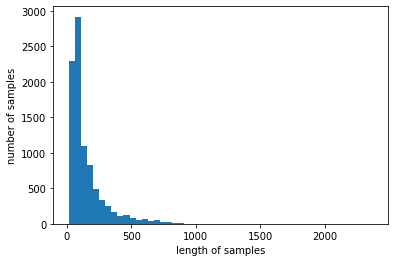

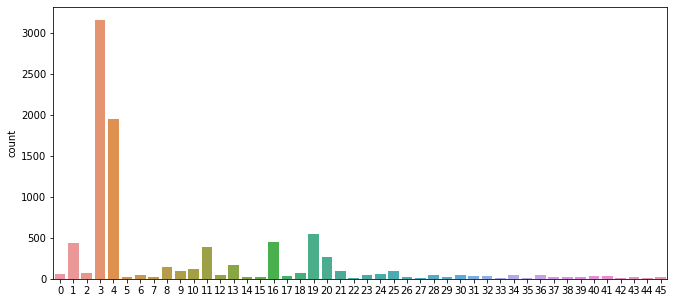

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]
=3
30979
=3
30979
=3
=3
<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
<sos> <unk> <unk> said as a result of its december acquisition of space co it expect

In [7]:
##### ONE-HOT 모델에서 오류 계속 남 / 데이터 전처리 및 벡터화

print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))
print(x_train.shape)
#print(dir(reuters))
#print(len(reuters.get_word_index()))

print(x_train[0])
print(x_test[0])

num_classes = y_train.max() + 1  #max(y_train) + 1
print('클래스의 수 : {}'.format(num_classes))

print('훈련용 뉴스의 최대 길이 :{}'.format(np.max([len(l) for l in x_train])))
print('훈련용 뉴스의 평균 길이 :{}'.format(np.mean([len(l) for l in x_train])))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train)
plt.show()

unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

word_index = reuters.get_word_index(path="reuters_word_index.json")
print('=3')
print(len(word_index))

word_index = reuters.get_word_index(path="reuters_word_index.json")
print('=3')
print(len(word_index))

index_to_word = { index+3 : word for word, index in word_index.items() }
print('=3')

# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token
print('=3')

print(' '.join([index_to_word[index] for index in x_train[0]]))

print(' '.join([index_to_word[index] for index in x_train[0]]))

## 전체 훈련용 뉴스 데이터와 전체 테스트용 뉴스 데이터를 텍스트 데이터로 변환
# train data
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))
# test data
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

# 변환여부 확인
x_train[:5]
x_test[:5]

## DTM을 생성하고, DTM의 크기를 확인
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
x_test_dtm =  dtmvector.transform(x_test)
print(x_train_dtm.shape, x_test_dtm.shape)

## TF-IDF Matrix 생성하고,크기를 확인
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
tfidfv_test = tfidf_transformer.transform(x_test_dtm)
print(tfidfv.shape, tfidfv_test.shape)
print(type(tfidfv))
print(tfidfv)

## TF-IDF Matrix 를 one_hot 형태의 array로 전환
tfidfv_array = tfidfv.todense()
tfidfv_test_array = tfidfv_test.todense()
print("tfidfv_array.shape", tfidfv_array.shape)

## train, test 로 변경저장 및 레이블 원핫벡터로 변경저장  
X_train_tensor = tfidfv_array.copy()
X_test_tensor = tfidfv_test_array.copy()
print("X_train_tensor[:3]",X_train_tensor[:3], X_train_tensor.shape)
print("X_test_tensor[:3]",X_test_tensor[:3], X_test_tensor.shape)

y_train_tensor = to_categorical(y_train)
y_test_tensor = to_categorical(y_test)
print("y_train_tensor[:3]",y_train_tensor[:3], y_train_tensor.shape)
print("y_test_tensor[:3]",y_test_tensor[:3], y_test_tensor.shape)

## Train, valid data 분리 : 
print("X_train_tensor 총개수:", X_train_tensor.shape)
train_len = int(X_train_tensor.shape[0]*0.8)
valid_len = X_train_tensor.shape[0] - train_len
print("train_len:", train_len, "valid_len",valid_len)

# validation set 20% 분리: 
X_val_tensor = X_train_tensor[:valid_len]   
y_val_tensor = y_train_tensor[:valid_len]

# validation set을 제외한 나머지 80%
partial_X_train = X_train_tensor[valid_len:]  
partial_y_train = y_train_tensor[valid_len:]

print("partial_X_train", partial_X_train.shape[0],"partial_y_train",len(partial_y_train))
print("X_val_tensor",X_val_tensor.shape[0], "y_val_tensor",len(y_val_tensor))
